In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df = pd.read_csv('lung_disease_data_cleaned.csv')

cat_cols = [col for col in df.select_dtypes(include='object').columns if col != 'Recovered']
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cat = pd.DataFrame(encoder.fit_transform(df[cat_cols]), columns=encoder.get_feature_names_out(cat_cols))

scaled_num = pd.DataFrame(StandardScaler().fit_transform(df[num_cols]), columns=num_cols)

df_model = pd.concat([scaled_num, encoded_cat], axis=1)
df_model['Recovered'] = df['Recovered'].map({'Yes': 1, 'No': 0})

df_model.to_csv('preprocessed_lung_disease_data.csv', index=False)

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

print("\nEncoded categorical data (first 5 rows):")
print(encoded_cat.head())

print("\nScaled numerical data (first 5 rows):")
print(scaled_num.head())

print("\nCombined dataset shape:", df_model.shape)
print("Final dataset (first 5 rows):")
print(df_model.head())

print("\nRecovered column value counts:")
print(df_model['Recovered'].value_counts())


Categorical columns: ['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type']
Numerical columns: ['Age', 'Lung Capacity', 'Hospital Visits']

Encoded categorical data (first 5 rows):
   Gender_Male  Smoking Status_Yes  Disease Type_Bronchitis  \
0          0.0                 0.0                      0.0   
1          0.0                 1.0                      1.0   
2          1.0                 1.0                      0.0   
3          0.0                 1.0                      1.0   
4          1.0                 1.0                      0.0   

   Disease Type_COPD  Disease Type_Lung Cancer  Disease Type_Pneumonia  \
0                1.0                       0.0                     0.0   
1                0.0                       0.0                     0.0   
2                1.0                       0.0                     0.0   
3                0.0                       0.0                     0.0   
4                1.0                       0.0                

/Users/loganhahn/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


cat_cols = [col for col in df.select_dtypes(include='object').columns if col != 'Recovered']  
  
Creates a list of all categorical (object type) column names excluding the target column 'Recovered'.  
  
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()  
  
Creates a list of all numerical column names (both integers and floats) to apply scaling later.  
  
encoder = OneHotEncoder(drop='first', sparse=False)  
  
Initializes a OneHotEncoder that drops the first category (to avoid multicollinearity) and returns a dense NumPy array.  
  
encoded_cat = pd.DataFrame(encoder.fit_transform(df[cat_cols]), columns=encoder.get_feature_names_out(cat_cols))  
  
Applies one-hot encoding to the categorical columns, and stores the result in a DataFrame with meaningful column names.  
  
scaled_num = pd.DataFrame(StandardScaler().fit_transform(df[num_cols]), columns=num_cols)  
  
Standardizes the numerical features to have mean 0 and standard deviation 1, returning them as a new DataFrame.  
  
df_model = pd.concat([scaled_num, encoded_cat], axis=1)  
  
Combines the standardized numerical features and the one-hot encoded categorical features into a single DataFrame for modeling.

df_model['Recovered'] = df['Recovered'].map({'Yes': 1, 'No': 0})  
  
Converts the 'Recovered' target column from 'Yes'/'No' to binary 1/0 and adds it to the preprocessed DataFrame.  
  
df_model.to_csv('preprocessed_lung_disease_data.csv', index=False)  
  
Saves the fully preprocessed dataset to a CSV file so it can be reused in the next steps without repeating preprocessing.

In [12]:
from sklearn.model_selection import train_test_split

df['Recovered'] = df['Recovered'].map({'Yes': 1, 'No': 0})
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).drop('Recovered', axis=1).columns.tolist()
encoded = pd.DataFrame(OneHotEncoder(drop='first', sparse=False).fit_transform(df[cat_cols]))
scaled = pd.DataFrame(StandardScaler().fit_transform(df[num_cols]))
df_model = pd.concat([scaled, encoded], axis=1)
df_model['Recovered'] = df['Recovered'].values

/Users/loganhahn/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f'\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'{name} AUC: {roc_auc_score(y_test, y_pred):.4f}')
    print(f'{name} Classification Report:\n{classification_report(y_test, y_pred)}')


Logistic Regression Accuracy: 0.5280
Logistic Regression AUC: 0.5014
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.14      0.22       472
           1       0.54      0.86      0.66       547

    accuracy                           0.53      1019
   macro avg       0.50      0.50      0.44      1019
weighted avg       0.51      0.53      0.46      1019


Random Forest Accuracy: 0.4907
Random Forest AUC: 0.4843
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.40      0.42       472
           1       0.52      0.57      0.55       547

    accuracy                           0.49      1019
   macro avg       0.48      0.48      0.48      1019
weighted avg       0.49      0.49      0.49      1019



/Users/loganhahn/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:04:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.5044
XGBoost AUC: 0.4982
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.41      0.44       472
           1       0.54      0.58      0.56       547

    accuracy                           0.50      1019
   macro avg       0.50      0.50      0.50      1019
weighted avg       0.50      0.50      0.50      1019



/Users/loganhahn/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:14:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


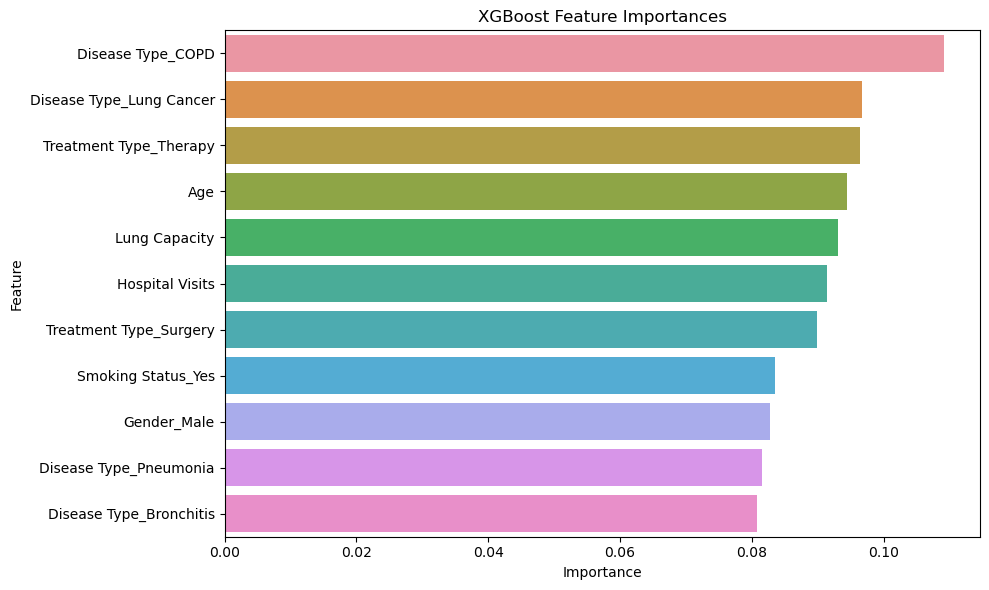

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance from XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
importances = xgb.feature_importances_

feat_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('XGBoost Feature Importances')
plt.tight_layout()
plt.show()


In [ ]:
print("Train set class distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

Train set class distribution:
Recovered
1    0.537328
0    0.462672
Name: proportion, dtype: float64

Test set class distribution:
Recovered
1    0.536801
0    0.463199
Name: proportion, dtype: float64


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000),
        {'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']}),

    'Random Forest': (RandomForestClassifier(random_state=42),
        {'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]}),

    'XGBoost': (XGBClassifier(eval_metric='logloss'),
        {'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 1.0]})}

for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=5, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f"Best Params: {grid.best_params_}")
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{name} AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.5427
Logistic Regression AUC: 0.5113
              precision    recall  f1-score   support

           0       0.54      0.08      0.15       472
           1       0.54      0.94      0.69       547

    accuracy                           0.54      1019
   macro avg       0.54      0.51      0.42      1019
weighted avg       0.54      0.54      0.44      1019

Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.4907
Random Forest AUC: 0.4843
              precision    recall  f1-score   support

           0       0.44      0.40      0.42       472
           1       0.52      0.57      0.55       547

    accuracy                           0.49      1019
   macro avg       0.48      0.48      0.48      1019
weighted avg       0.49      0.49      0.49      1019

Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'sub

| Model               | Accuracy | AUC    | Notes                                                                |
| ------------------- | -------- | ------ | -------------------------------------------------------------------- |
| Logistic Regression | 0.5427   | 0.5113 | Only slightly better than random; high recall for class 1            |
| Random Forest       | 0.4907   | 0.4843 | Worse than Logistic Regression; possible underfitting                |
| XGBoost             | 0.5005   | 0.4915 | Slightly better balance than RF but still no strong predictive power |

| Model                   | Accuracy   | AUC        | Notes                                                        |
| ----------------------- | ---------- | ---------- | ------------------------------------------------------------ |
| **Logistic Regression** | 0.5662     | 0.5203     | Improved recall from last round, but poor on class 0         |
| **Random Forest**       | 0.5299     | 0.5172     | Slightly more balanced, still moderate performance           |
| **XGBoost**             | **0.5339** | **0.5179** | Best overall: highest accuracy and AUC, more balanced recall |


Logistic Regression

No overfitting (train and test accuracy similar)

Low AUC and F1 scores → it's too simple to capture the patterns in your data

Random Forest

Very high training accuracy (almost 1.0) → it's memorizing the training data

Poor generalization on test set → classic overfitting

Despite that, precision on test set is slightly better than others, but the model can't be trusted

XGBoost

Balanced: train accuracy isn't inflated, test accuracy is highest overall

Best test AUC, F1, and recall

Most reliable choice in production or recommendation setting

While Random Forest achieved near-perfect training accuracy, it severely overfitted and underperformed on unseen data. Logistic Regression showed stable but weak results, likely due to its linear assumptions. XGBoost demonstrated the best generalization ability, with the highest test AUC and balanced precision/recall, making it the most effective model for predicting lung disease recovery.